<a href="https://colab.research.google.com/github/apurbaanik/ML_Final_Project_NBA/blob/main/ML_Final_Project_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Final Project - NBA Champion Prediction Based on Regular Season Stats

---


- Team: Anik Barua, Kashyapa Jayasekera
- CS-UY 4563 B
- Date: 12-07-2022

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

## Part 1: Loading the dataset

In [3]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
url = 'https://raw.githubusercontent.com/apurbaanik/ML_Final_Project_NBA/main/NBA_Team_Stats.csv'
df = pd.read_csv(url)
df

,No,Team,G,Min,Pts,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,FGPct,3PPct,FTPct,Eff,Deff,Year,Won
0,1,Chicago,103,48.4,96.0,44.1,23.1,8.6,4.3,13.0,21.1,29.2,14.9,0.449,0.323,0.741,111.6,17.5,1997-1998,Yes
1,2,Utah,102,48.3,98.6,40.8,24.7,7.6,4.8,14.7,24.3,29.5,11.3,0.483,0.368,0.768,116.3,17.5,1997-1998,No
2,3,Phoenix,86,48.6,99.3,41.9,25.6,9.2,5.3,14.4,21.7,29.8,12.1,0.466,0.355,0.747,117.1,13.6,1997-1998,No
3,4,L.A.Lakers,95,48.3,104.8,42.9,24.3,8.7,6.8,14.7,22.9,29.7,13.2,0.480,0.350,0.675,120.8,13.2,1997-1998,No
4,5,San Antonio,91,48.4,92.5,44.1,21.9,6.2,6.9,15.3,21.2,32.2,11.9,0.468,0.344,0.688,108.0,13.1,1997-1998,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,25,Sacramento,82,48.3,110.3,42.9,23.7,7.2,4.5,13.5,18.9,33.4,9.6,0.460,0.344,0.768,122.1,-13.4,2021-2022,No
721,26,Orlando,82,48.2,104.2,44.3,23.7,6.8,4.5,13.8,19.7,35.2,9.1,0.434,0.331,0.787,115.5,-16.0,2021-2022,No
722,27,Detroit,82,48.2,104.8,43.0,23.5,7.7,4.8,13.4,21.9,32.0,11.0,0.430,0.326,0.782,115.1,-16.7,2021-2022,No
723,28,Portland,82,48.1,106.2,42.9,22.9,8.0,4.5,13.7,21.1,32.5,10.4,0.443,0.346,0.760,117.1,-19.0,2021-2022,No


## Part 2: Preprocessing Step
1. Dropping columns: "No", "Team", "Year"
2. Implementing One Hot Encoding for "Won" column
3. Normalize the dataset

In [4]:
df = df.drop(columns=['No', 'Team', 'Year'])
df

,G,Min,Pts,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,FGPct,3PPct,FTPct,Eff,Deff,Won
0,103,48.4,96.0,44.1,23.1,8.6,4.3,13.0,21.1,29.2,14.9,0.449,0.323,0.741,111.6,17.5,Yes
1,102,48.3,98.6,40.8,24.7,7.6,4.8,14.7,24.3,29.5,11.3,0.483,0.368,0.768,116.3,17.5,No
2,86,48.6,99.3,41.9,25.6,9.2,5.3,14.4,21.7,29.8,12.1,0.466,0.355,0.747,117.1,13.6,No
3,95,48.3,104.8,42.9,24.3,8.7,6.8,14.7,22.9,29.7,13.2,0.480,0.350,0.675,120.8,13.2,No
4,91,48.4,92.5,44.1,21.9,6.2,6.9,15.3,21.2,32.2,11.9,0.468,0.344,0.688,108.0,13.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,82,48.3,110.3,42.9,23.7,7.2,4.5,13.5,18.9,33.4,9.6,0.460,0.344,0.768,122.1,-13.4,No
721,82,48.2,104.2,44.3,23.7,6.8,4.5,13.8,19.7,35.2,9.1,0.434,0.331,0.787,115.5,-16.0,No
722,82,48.2,104.8,43.0,23.5,7.7,4.8,13.4,21.9,32.0,11.0,0.430,0.326,0.782,115.1,-16.7,No
723,82,48.1,106.2,42.9,22.9,8.0,4.5,13.7,21.1,32.5,10.4,0.443,0.346,0.760,117.1,-19.0,No


#### Converting df to data(<np.ndarray>)

In [5]:
X = np.array(df[['G','Min','Pts','Reb','Ast','Stl','Blk','To','Pf','Dreb','Oreb','FGPct','3PPct','FTPct','Eff','Deff']])
y = np.array(df[['Won']])

#### One Hot Encoding


In [6]:
one_hot_encoding = OneHotEncoder()
transformed = one_hot_encoding.fit_transform(y)
y = (transformed.toarray())[:,1]

#### Training and Validation Set
Splitting the data in 70% training, 20% test, and 20% validation

In [7]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,test_size = 0.2, random_state=10, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.1, random_state=10, shuffle=True)

In [8]:
print('X_train:' + str(X_train.shape))
print('y_train:' + str(y_train.shape))
print('X_val: \t'  + str(X_val.shape))
print('y_val: \t'  + str(y_val.shape))
print('X_test: '  + str(X_test.shape))
print('y_test: '  + str(y_test.shape))

X_train:(522, 16)
y_train:(522,)
X_val: 	(58, 16)
y_val: 	(58,)
X_test: (145, 16)
y_test: (145,)


Normalize values in X

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

# Part 3: Model

## Support Vector Machine - SVM

In [10]:
from sklearn import svm

#### Linear SVM
L2 Regularization, Squared Hinge, Using Primal Optimization 

In [11]:
Cs = np.logspace(-3, 3, 7)
test_acc = []
train_acc = []

In [12]:
for i in range(len(Cs)):
  svc = svm.LinearSVC(penalty = 'l2', loss = 'squared_hinge', max_iter = 100000, dual = False, C = Cs[i])
  svc.fit(X_train, y_train)
  print("C = ", Cs[i])
  training_acc = svc.score(X_train, y_train)
  testing_acc = svc.score(X_test, y_test)
  test_acc.append(testing_acc)
  train_acc.append(training_acc)
  print("Training accuracy:", training_acc) 
  print("Testing accuracy: "+ str(testing_acc) + "\n")

C =  0.001
Training accuracy: 0.9712643678160919
Testing accuracy: 0.9586206896551724

C =  0.01
Training accuracy: 0.9712643678160919
Testing accuracy: 0.9586206896551724

C =  0.1
Training accuracy: 0.9712643678160919
Testing accuracy: 0.9586206896551724

C =  1.0
Training accuracy: 0.9770114942528736
Testing accuracy: 0.9655172413793104

C =  10.0
Training accuracy: 0.9789272030651341
Testing accuracy: 0.9655172413793104

C =  100.0
Training accuracy: 0.9789272030651341
Testing accuracy: 0.9655172413793104

C =  1000.0
Training accuracy: 0.9770114942528736
Testing accuracy: 0.9655172413793104



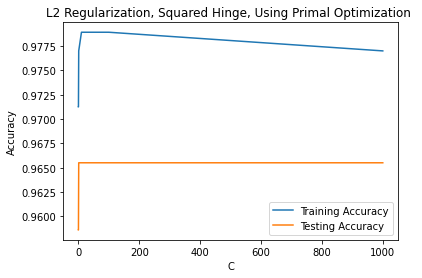

In [13]:
plt.plot(Cs, train_acc, label = "Training Accuracy")
plt.plot(Cs, test_acc, label = "Testing Accuracy")
plt.title("L2 Regularization, Squared Hinge, Using Primal Optimization ")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

L2 Regularization, Hinge Loss Function, Using Dual Optimization



In [14]:
Cs = np.logspace(-3, 3, 7)
test_acc = []
train_acc = []

In [15]:
for i in range(len(Cs)):
  svc = svm.LinearSVC(penalty = 'l2', loss = 'hinge', max_iter = 100000, dual = True, C = Cs[i])
  svc.fit(X_train, y_train)
  print("C = ", Cs[i])
  training_acc = svc.score(X_train, y_train)
  testing_acc = svc.score(X_test, y_test)
  test_acc.append(testing_acc)
  train_acc.append(training_acc)
  print("Training accuracy:", training_acc) 
  print("Testing accuracy: "+ str(testing_acc) + "\n")

C =  0.001
Training accuracy: 0.9731800766283525
Testing accuracy: 0.9586206896551724

C =  0.01
Training accuracy: 0.9712643678160919
Testing accuracy: 0.9586206896551724

C =  0.1
Training accuracy: 0.9712643678160919
Testing accuracy: 0.9586206896551724

C =  1.0
Training accuracy: 0.9712643678160919
Testing accuracy: 0.9586206896551724

C =  10.0
Training accuracy: 0.9789272030651341
Testing accuracy: 0.9655172413793104

C =  100.0
Training accuracy: 0.9827586206896551
Testing accuracy: 0.9724137931034482

C =  1000.0
Training accuracy: 0.9789272030651341
Testing accuracy: 0.9724137931034482



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


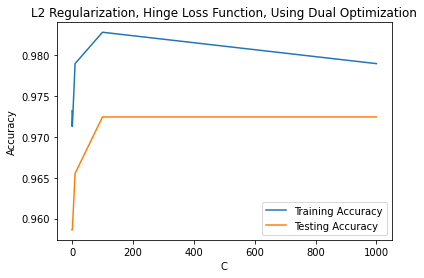

In [16]:
plt.plot(Cs, train_acc, label = "Training Accuracy")
plt.plot(Cs, test_acc, label = "Testing Accuracy")
plt.title("L2 Regularization, Hinge Loss Function, Using Dual Optimization")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

L1 Regularization, Squared Hinge

In [17]:
Cs = np.logspace(-3, 3, 7)
test_acc = []
train_acc = []

In [18]:
for i in range(len(Cs)):
  svc = svm.LinearSVC(penalty = 'l1', max_iter = 100000, dual = False)
  svc.fit(X_train, y_train)
  print("C = ", Cs[i])
  training_acc = svc.score(X_train, y_train)
  testing_acc = svc.score(X_test, y_test)
  test_acc.append(testing_acc)
  train_acc.append(training_acc)
  print("Training accuracy:", training_acc) 
  print("Testing accuracy: " + str(testing_acc) + "\n")

C =  0.001
Training accuracy: 0.9770114942528736
Testing accuracy: 0.9655172413793104

C =  0.01
Training accuracy: 0.9770114942528736
Testing accuracy: 0.9655172413793104

C =  0.1
Training accuracy: 0.9770114942528736
Testing accuracy: 0.9655172413793104

C =  1.0
Training accuracy: 0.9770114942528736
Testing accuracy: 0.9655172413793104

C =  10.0
Training accuracy: 0.9770114942528736
Testing accuracy: 0.9655172413793104

C =  100.0
Training accuracy: 0.9770114942528736
Testing accuracy: 0.9655172413793104

C =  1000.0
Training accuracy: 0.9770114942528736
Testing accuracy: 0.9655172413793104



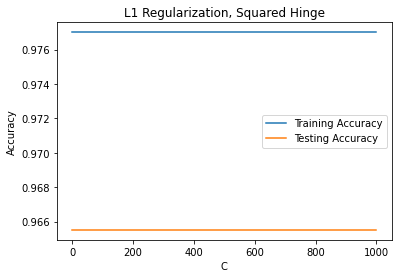

In [19]:
plt.plot(Cs, train_acc, label = "Training Accuracy")
plt.plot(Cs, test_acc, label = "Testing Accuracy")
plt.title("L1 Regularization, Squared Hinge")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Confusion matrix for L2 Regularization, Hinge Loss Function, Using Dual Optimization, C = 100

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[Text(0, 0.5, 'Actual Win'),
 Text(0.5, 0, 'Predicted Win'),
 Text(0.5, 1.0, 'Confusion Matrix')]

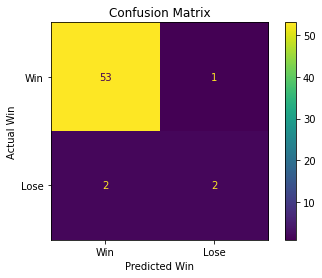

In [20]:
clf = svm.LinearSVC(penalty = 'l2', loss = 'hinge', max_iter = 100000, dual = True, C = Cs[i])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels = ['Win', 'Lose'])
cmd.plot()
cmd.ax_.set(title = 'Confusion Matrix',
            xlabel = 'Predicted Win',
            ylabel = 'Actual Win')

####Optimal Polynomial Kernel SVM with RandomizedSearchCV

In [21]:
degree = np.linspace(1, 10, 10)
C = np.logspace(-3, 3, 6)
hyperparameters = dict(C=C, degree=degree)
polySVC = svm.SVC(kernel = 'poly', max_iter = 1000000)
clf = RandomizedSearchCV(polySVC, hyperparameters, random_state = 1, n_iter = 60, cv = 10)

In [22]:
polySVC = svm.SVC(kernel = 'poly', max_iter = 1000000)
clf = RandomizedSearchCV(polySVC, hyperparameters, random_state = 1, n_iter = 60, cv = 10)

In [23]:
optimal_model = clf.fit(X_train, y_train)

In [24]:
print("Optimal polynomial degree: ", optimal_model.best_estimator_.get_params()['degree'])
print("Optimal C: ", optimal_model.best_estimator_.get_params()['C'])
print("Highest Score (training accuracy): ", optimal_model.best_score_)
print("Testing accuracy: ", clf.score(X_test, y_test))

Optimal polynomial degree:  9.0
Optimal C:  0.001
Highest Score (training accuracy):  0.9731857764876632
Testing accuracy:  0.9586206896551724


[Text(0, 0.5, 'Actual Win'),
 Text(0.5, 0, 'Predicted Win'),
 Text(0.5, 1.0, 'Confusion Matrix')]

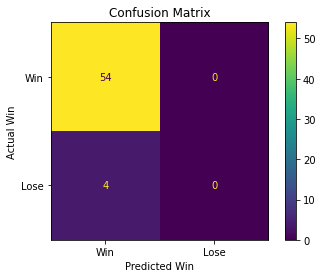

In [25]:
y_pred = clf.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels = ['Win', 'Lose'])
cmd.plot()
cmd.ax_.set(title = 'Confusion Matrix',
            xlabel = 'Predicted Win',
            ylabel = 'Actual Win')

#### Radial Basis Function Kernel

In [26]:
gammas = np.logspace(-3, 2, 6)
test_acc = []
train_acc = []

In [27]:
for i in range(len(gammas)):
  rbfSVC = svm.SVC(gamma = gammas[i], max_iter = 100000)
  rbfSVC.fit(X_train, y_train)
  print("\u03B3 = ", gammas[i])
  training_acc = rbfSVC.score(X_train, y_train)
  testing_acc = rbfSVC.score(X_test, y_test)
  test_acc.append(testing_acc)
  train_acc.append(training_acc)
  print("Training accuracy:", training_acc) 
  print("Testing accuracy: " + str(testing_acc) + "\n")

γ =  0.001
Training accuracy: 0.9712643678160919
Testing accuracy: 0.9586206896551724

γ =  0.01
Training accuracy: 0.9712643678160919
Testing accuracy: 0.9586206896551724

γ =  0.1
Training accuracy: 0.9712643678160919
Testing accuracy: 0.9586206896551724

γ =  1.0
Training accuracy: 1.0
Testing accuracy: 0.9586206896551724

γ =  10.0
Training accuracy: 1.0
Testing accuracy: 0.9586206896551724

γ =  100.0
Training accuracy: 1.0
Testing accuracy: 0.9586206896551724



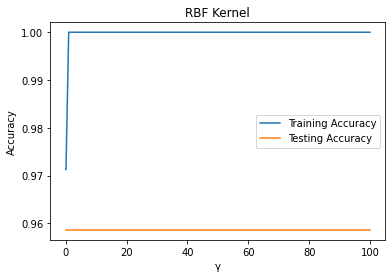

In [28]:
plt.plot(gammas, train_acc, label = "Training Accuracy")
plt.plot(gammas, test_acc, label = "Testing Accuracy")
plt.title("RBF Kernel")
plt.xlabel("\u03B3")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Confusion matrix for gamma = 0.001




[Text(0, 0.5, 'Actual Win'),
 Text(0.5, 0, 'Predicted Win'),
 Text(0.5, 1.0, 'Confusion Matrix')]

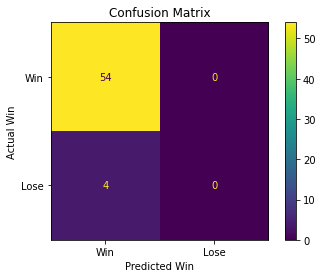

In [29]:
clf = svm.SVC(gamma = 0.001, max_iter = 100000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels = ['Win', 'Lose'])
cmd.plot()
cmd.ax_.set(title = 'Confusion Matrix',
            xlabel = 'Predicted Win',
            ylabel = 'Actual Win')